In [15]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 5
             }
plt.rcParams.update(parameters)

In [253]:
# Parameters

# Case: Peacocks

# R = 100 # 'resource': peahens
# b = 1/50 # 'clearance rate': Dimension: area/time/peacock, Unit: sqm/year/#peacocks
# c_max = 200 # 'max consumption': maximum matings per year
# M = 1/5 # metabolism
# eps = 0.8 # 'efficiency': successfull matings leading to offspring
# m0 = 0.2 # backgrond mortality
# mp = 0.5 # mortality due to "predation"
# theta_list = np.linspace(0, 1000, 10000)
# b = 1/50


R = 100 # 'resource': peahens
c_max = 100 # 'max consumption': maximum matings(females) per year per peacock
M = 0.2 # metabolism 0.2
eps = 0.5 # 'efficiency': successfull matings leading to offspring
m0 = 0.3 # backgrond mortality
mp = 0.2 # mortality due to "predation"/'immune supression'
theta_list = np.linspace(100, 300, 1000)
b = -30 
# making the functional depandencies of trait theta
a=0.3


# R = 100 # 'resource': peahens
# c_max = 100 # 'max consumption': maximum matings(females) per year per peacock
# M = 5 # metabolism 0.2
# eps = 0.5 # 'efficiency': successfull matings leading to offspring
# m0 = 0.03 # backgrond mortality
# mp = 0.02 # mortality due to "predation"/'immune supression'
# theta_list = np.linspace(10, 30, 1000)
# b = -0.3 
# # making the functional depandencies of trait theta
# a=0.003

B = lambda theta: a*theta + b # 'clearance rate': Dimension: females/time/peacock, Unit: sqkm/year/#peacocks
G = lambda theta: eps*(c_max*B(theta)*R/(c_max + B(theta)*R) - M) # gains
Mort = lambda theta: m0 + mp*theta #np.log(theta+1) # mortality

r = lambda theta: G(theta) - Mort(theta) # growth rate as function of trait theta

max_index = [i for i,v in enumerate(r(theta_list)) if v==max(r(theta_list))][0]
root_r = sp.optimize.root_scalar(r, bracket=[200, 400]).root

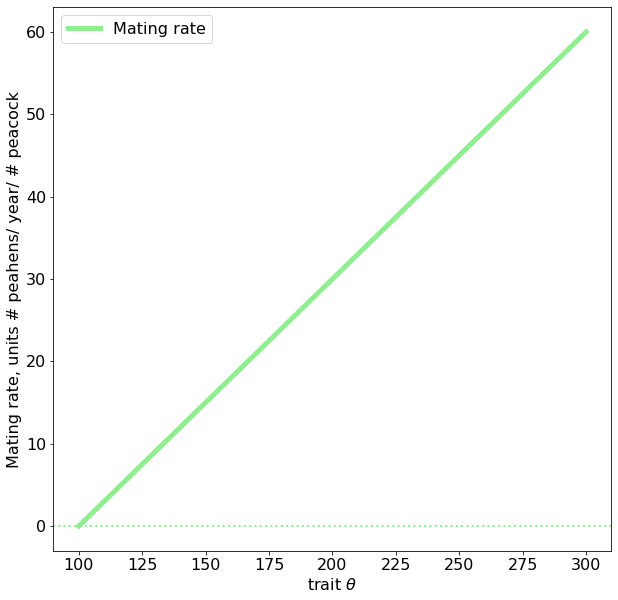

In [254]:
fig, ax = plt.subplots(1, figsize=(10,10)) #, sharex=True
ax.plot(theta_list, B(theta_list), color = 'lightgreen', label = 'Mating rate')
ax.axhline(0, linewidth = 2, linestyle = ':', color = 'lightgreen')
ax.set_xlabel("trait $\\theta$")
ax.set_ylabel("Mating rate, units # peahens/ year/ # peacock")
ax.legend()

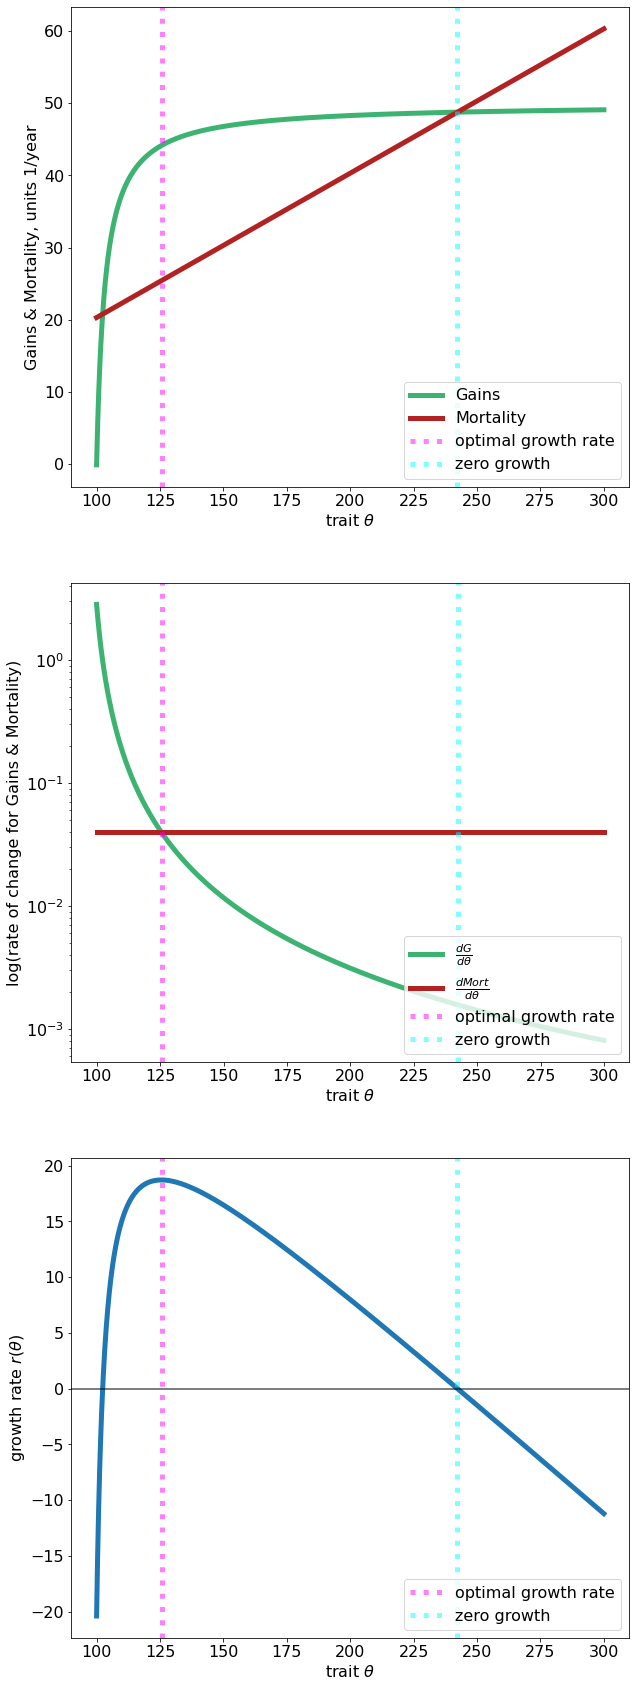

In [255]:
# if True:
fig, ax = plt.subplots(3, 1, figsize=(10,30)) #, sharex=True
#ax[0].plot(theta_list, B(theta_list), label="B")
ax[0].plot(theta_list, G(theta_list), label="Gains", color = 'mediumseagreen')
ax[0].plot(theta_list, Mort(theta_list), label = 'Mortality', color = 'firebrick')
ax[0].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[0].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[0].set_xlabel("trait $\\theta$")
ax[0].set_ylabel("Gains & Mortality, units 1/year")
ax[0].legend(loc="lower right")
#ax[0].set_yscale("log")

#ax[1].plot(theta_list[:-1], np.diff(B(theta_list)), label="$\\frac{d B}{d \\theta}$")
# Here we differentiate numerically to find the rate of change
# Basically we find the difference between each two points. So we end up with one point less. So we need one less theta.
ax[1].plot(theta_list[:-1], np.diff(G(theta_list)), label="$\\frac{d G}{d \\theta}$", color = 'mediumseagreen')
ax[1].plot(theta_list[:-1], np.diff(Mort(theta_list)), label="$\\frac{d Mort}{d \\theta}$", color = 'firebrick')
ax[1].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[1].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[1].set_xlabel("trait $\\theta$")
ax[1].set_ylabel("log(rate of change for Gains & Mortality)")
ax[1].legend(loc="lower right")
ax[1].set_yscale("log")


#fig, ax = plt.subplots(figsize=(16,8))
ax[2].plot(theta_list, r(theta_list))
ax[2].axhline (0, linewidth=2, color="k", alpha=0.5)
ax[2].set_xlabel("trait $\\theta$")
ax[2].set_ylabel("growth rate $r(\\theta)$")
ax[2].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[2].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[2].legend(loc="lower right")
#ax.set_yscale("log")


In [256]:
tmp_theta_list = [theta_list[max_index] + i*2 for i in range(-10, 10)]
state_init = [100]*len(tmp_theta_list)
params = tuple(tmp_theta_list)

def deriv(state, t, *params):
    return np.array([r(theta)*state[i] for i, theta in enumerate(params)])

t_list = np.linspace(0, 5, 100)
ns = odeint(deriv, state_init, t_list, args=params)
#fig, ax = plt.subplots(figsize=(16,8))
#ax.plot(t_list, ns)
#ax.set_yscale("log")

105.62562562562563
107.62562562562563
109.62562562562563
111.62562562562563
113.62562562562563
115.62562562562563
117.62562562562563
119.62562562562563
121.62562562562563
123.62562562562563
125.62562562562563
127.62562562562563
129.62562562562562
131.62562562562562
133.62562562562562
135.62562562562562
137.62562562562562
139.62562562562562
141.62562562562562
143.62562562562562


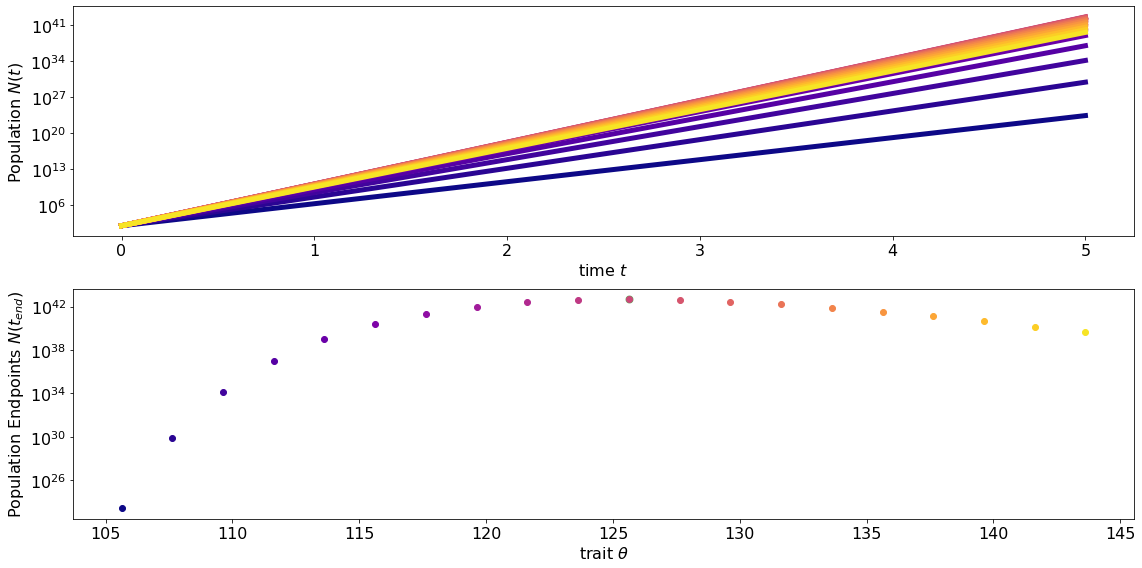

In [257]:
fig, ax = plt.subplots(2, 1, figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    print(tmp_theta) 
    if tmp_theta == theta_list[max_index]:
        ax[1].scatter(tmp_theta, sol[-1], s=50, color="green", alpha=0.5, label="optimal growth") # this dont plot for some reason...
    ax[0].plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")
    ax[1].scatter(tmp_theta, sol[-1], color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax[0].set_ylabel("Population $N(t)$")
ax[0].set_xlabel("time $t$")
ax[0].set_yscale("log")
# ax[0].legend()
#ax[0].legend(bbox_to_anchor=(1.2,1.15)) ### Something is wring with this legend, when using tight layout...

ax[1].set_ylabel("Population Endpoints $N(t_{end})$")
ax[1].set_xlabel("trait $\\theta$")
ax[1].set_yscale("log")
#ax[1].legend()

In [259]:
tmp_theta_list = [theta_list[max_index] + i*2 for i in range(-10, 10)]
state_init = [1/len(tmp_theta_list)]*len(tmp_theta_list)
params = tuple(tmp_theta_list)

def deriv_compare(state, t, *params):
    s = lambda cur_theta: np.sum(np.array([(r(cur_theta) - r(theta))*state[i] for i, theta in enumerate(params)]))
    pdots = np.array([state[i]*s(theta) for i, theta in enumerate(params)])
    return pdots

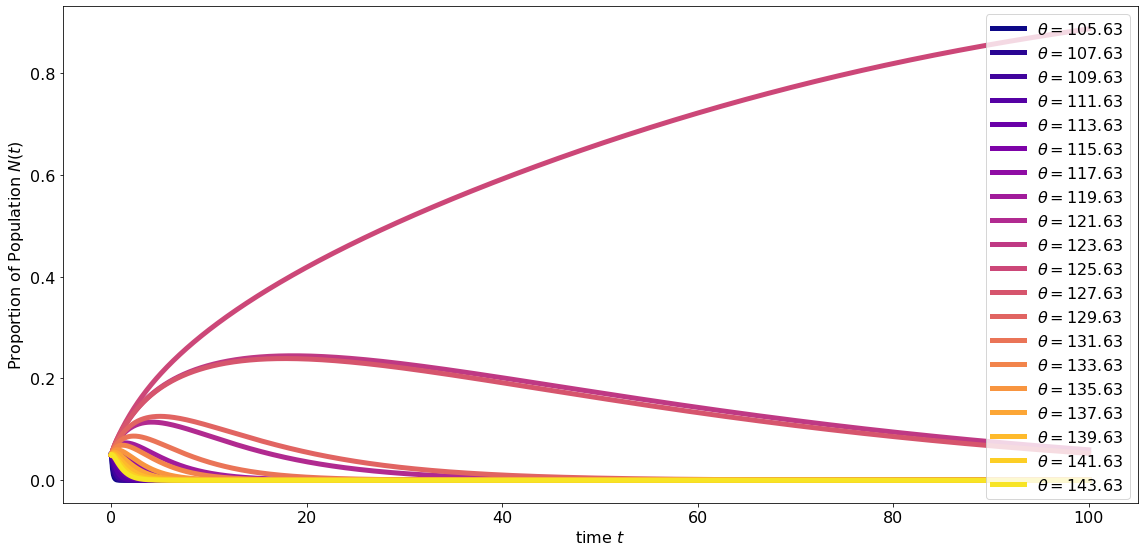

In [260]:
# Long time scale: 
t_list = np.linspace(0, 100, 1000)
ns = odeint(deriv_compare, state_init, t_list, args=params)

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()

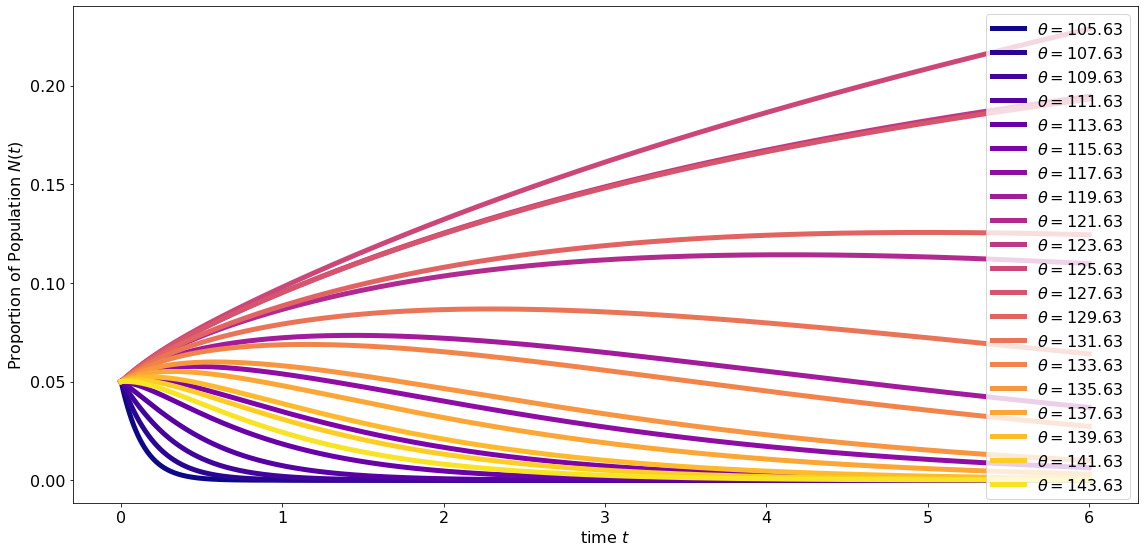

In [261]:
# Long time scale: 

t_list = np.linspace(0, 6, 1000)
ns = odeint(deriv_compare, state_init, t_list, args=params)

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()

In [220]:
state_init

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [242]:
# Parameters

# Case: Peacocks

R = 100 # 'resource': peahens
b = 1/50 # 'clearance rate': Dimension: area/time/peacock, Unit: sqm/year/#peacocks
c_max = 200 # 'max consumption': maximum matings per year
M = 1/5 # metabolism
eps = 0.8 # 'efficiency': successfull matings leading to offspring
m0 = 0.2 # backgrond mortality
mp = 0.5 # mortality due to "predation"
theta_list = np.linspace(0, 1000, 10000)
b = 1/50
a = 0.2

# R = 100 # 'resource': peahens
# c_max = 100 # 'max consumption': maximum matings(females) per year per peacock
# M = 0.2 # metabolism 0.2
# eps = 0.5 # 'efficiency': successfull matings leading to offspring
# m0 = 0.3 # backgrond mortality
# mp = 0.2 # mortality due to "predation"/'immune supression'
# theta_list = np.linspace(100, 300, 1000)
# b = -30 
# # making the functional depandencies of trait theta
# a=0.3


# R = 100 # 'resource': peahens
# c_max = 100 # 'max consumption': maximum matings(females) per year per peacock
# M = 5 # metabolism 0.2
# eps = 0.5 # 'efficiency': successfull matings leading to offspring
# m0 = 0.03 # backgrond mortality
# mp = 0.02 # mortality due to "predation"/'immune supression'
# theta_list = np.linspace(10, 30, 1000)
# b = -0.3 
# # making the functional depandencies of trait theta
# a=0.003

B = lambda theta: a*theta + b # 'clearance rate': Dimension: females/time/peacock, Unit: sqkm/year/#peacocks
G = lambda theta: eps*(c_max*B(theta)*R/(c_max + B(theta)*R) - M) # gains
Mort = lambda theta: m0 + mp*theta #np.log(theta+1) # mortality

r = lambda theta: G(theta) - Mort(theta) # growth rate as function of trait theta

max_index = [i for i,v in enumerate(r(theta_list)) if v==max(r(theta_list))][0]
root_r = sp.optimize.root_scalar(r, bracket=[200, 400]).root

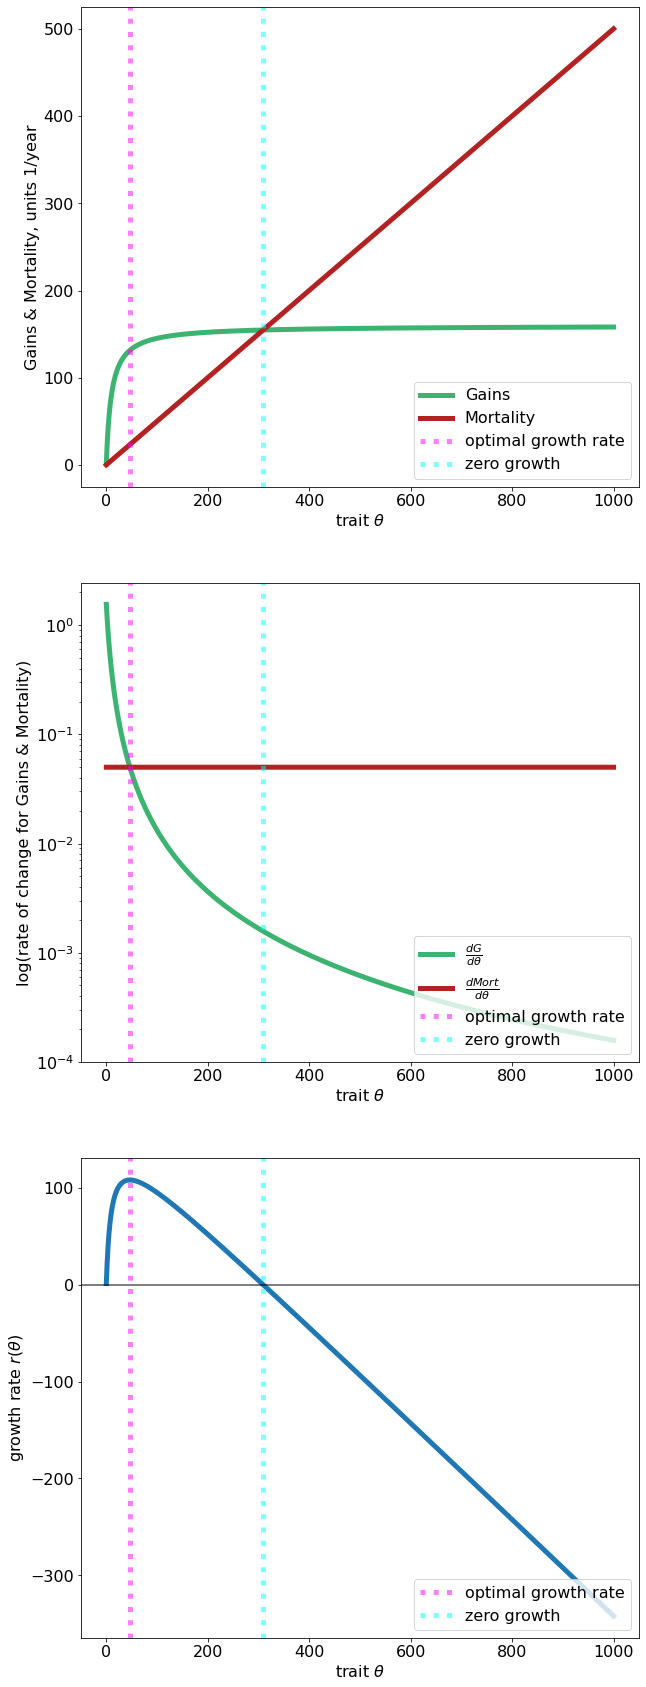

In [243]:
# if True:
fig, ax = plt.subplots(3, 1, figsize=(10,30)) #, sharex=True
#ax[0].plot(theta_list, B(theta_list), label="B")
ax[0].plot(theta_list, G(theta_list), label="Gains", color = 'mediumseagreen')
ax[0].plot(theta_list, Mort(theta_list), label = 'Mortality', color = 'firebrick')
ax[0].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[0].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[0].set_xlabel("trait $\\theta$")
ax[0].set_ylabel("Gains & Mortality, units 1/year")
ax[0].legend(loc="lower right")
#ax[0].set_yscale("log")

#ax[1].plot(theta_list[:-1], np.diff(B(theta_list)), label="$\\frac{d B}{d \\theta}$")
# Here we differentiate numerically to find the rate of change
# Basically we find the difference between each two points. So we end up with one point less. So we need one less theta.
ax[1].plot(theta_list[:-1], np.diff(G(theta_list)), label="$\\frac{d G}{d \\theta}$", color = 'mediumseagreen')
ax[1].plot(theta_list[:-1], np.diff(Mort(theta_list)), label="$\\frac{d Mort}{d \\theta}$", color = 'firebrick')
ax[1].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[1].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[1].set_xlabel("trait $\\theta$")
ax[1].set_ylabel("log(rate of change for Gains & Mortality)")
ax[1].legend(loc="lower right")
ax[1].set_yscale("log")


#fig, ax = plt.subplots(figsize=(16,8))
ax[2].plot(theta_list, r(theta_list))
ax[2].axhline (0, linewidth=2, color="k", alpha=0.5)
ax[2].set_xlabel("trait $\\theta$")
ax[2].set_ylabel("growth rate $r(\\theta)$")
ax[2].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[2].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[2].legend(loc="lower right")
#ax.set_yscale("log")


In [244]:

tmp_theta_list = [theta_list[max_index] + i*3 for i in range(-10, 10)]
state_init = [100]*len(tmp_theta_list)
params = tuple(tmp_theta_list)

def deriv(state, t, *params):
    return np.array([r(theta)*state[i] for i, theta in enumerate(params)])

t_list = np.linspace(0, 5, 1000)
ns = odeint(deriv, state_init, t_list, args=params)

16.504650465046502
19.504650465046502
22.504650465046502
25.504650465046502
28.504650465046502
31.504650465046502
34.5046504650465
37.5046504650465
40.5046504650465
43.5046504650465
46.5046504650465
49.5046504650465
52.5046504650465
55.5046504650465
58.5046504650465
61.5046504650465
64.5046504650465
67.5046504650465
70.5046504650465
73.5046504650465


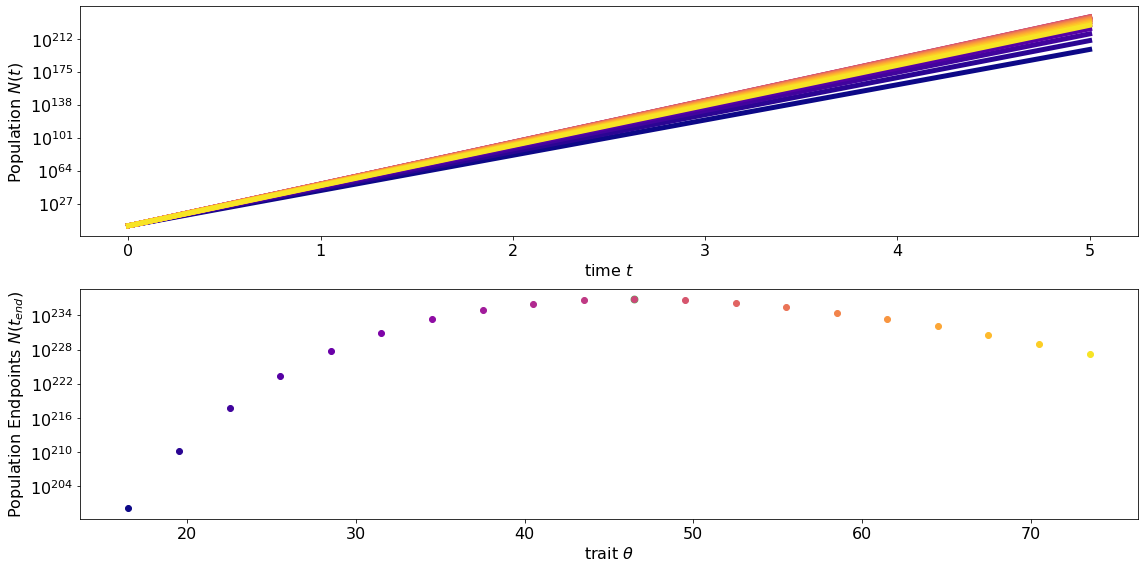

In [245]:
fig, ax = plt.subplots(2, 1, figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    print(tmp_theta) 
    if tmp_theta == theta_list[max_index]:
        ax[1].scatter(tmp_theta, sol[-1], s=50, color="green", alpha=0.5, label="optimal growth") # this dont plot for some reason...
    ax[0].plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")
    ax[1].scatter(tmp_theta, sol[-1], color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax[0].set_ylabel("Population $N(t)$")
ax[0].set_xlabel("time $t$")
ax[0].set_yscale("log")
# ax[0].legend()
#ax[0].legend(bbox_to_anchor=(1.2,1.15)) ### Something is wring with this legend, when using tight layout...

ax[1].set_ylabel("Population Endpoints $N(t_{end})$")
ax[1].set_xlabel("trait $\\theta$")
ax[1].set_yscale("log")
#ax[1].legend()

In [248]:
tmp_theta_list = [theta_list[max_index] + i*3 for i in range(-10, 10)]
state_init = [1/len(tmp_theta_list)]*len(tmp_theta_list)
params = tuple(tmp_theta_list)

def deriv_compare(state, t, *params):
    s = lambda cur_theta: np.sum(np.array([(r(cur_theta) - r(theta))*state[i] for i, theta in enumerate(params)]))
    pdots = np.array([state[i]*s(theta) for i, theta in enumerate(params)])
    return pdots


#ns = np.array([timestep/np.sum(timestep) for timestep in ns])


In [250]:
state_init

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

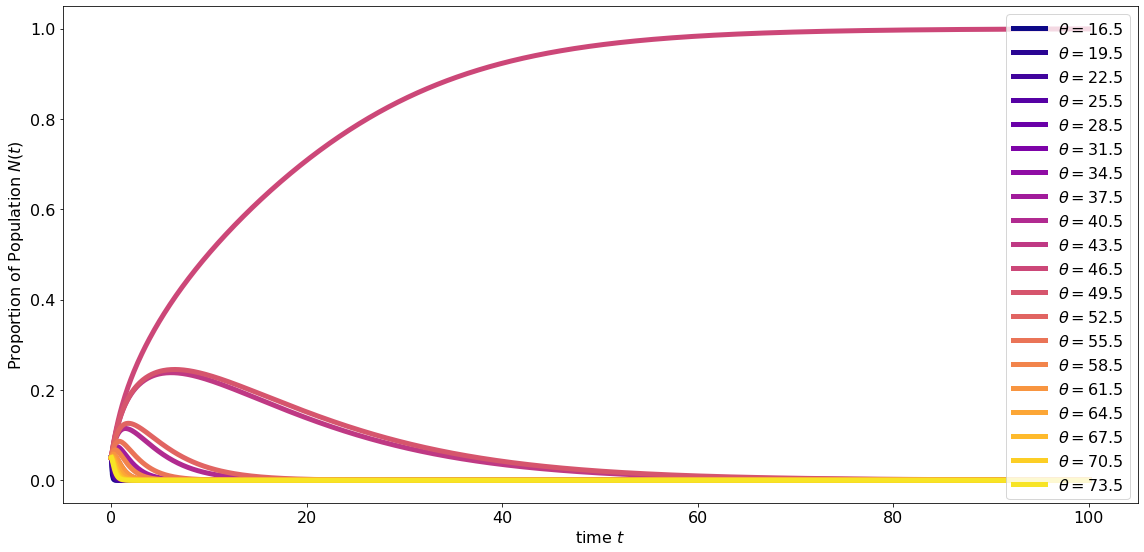

In [247]:
# Long time scale: 
t_list = np.linspace(0, 100, 1000)
ns = odeint(deriv_compare, state_init, t_list, args=params)

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()

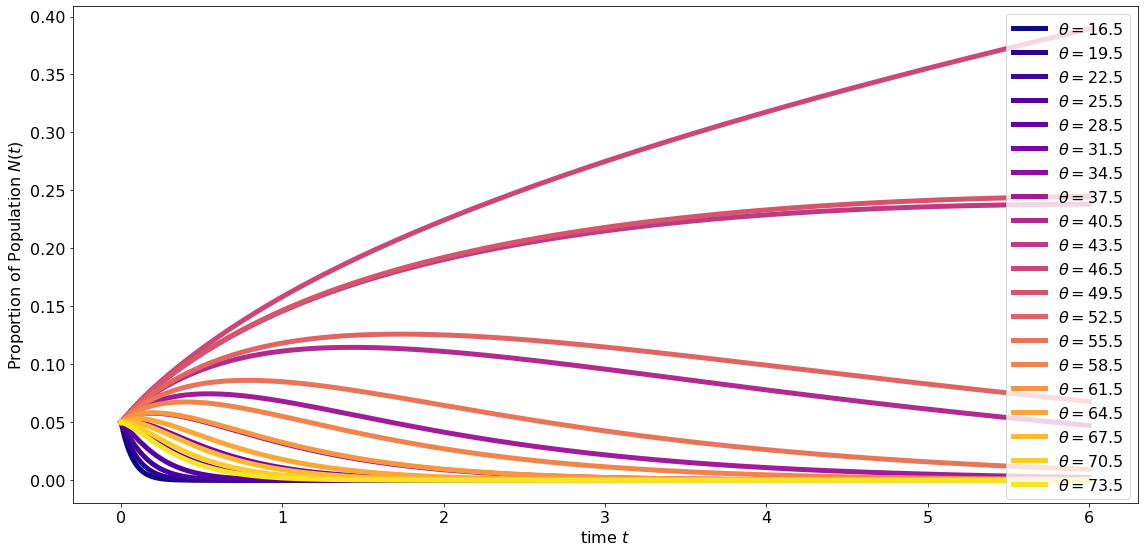

In [251]:
# Long time scale: 

t_list = np.linspace(0, 6, 1000)
ns = odeint(deriv_compare, state_init, t_list, args=params)

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()

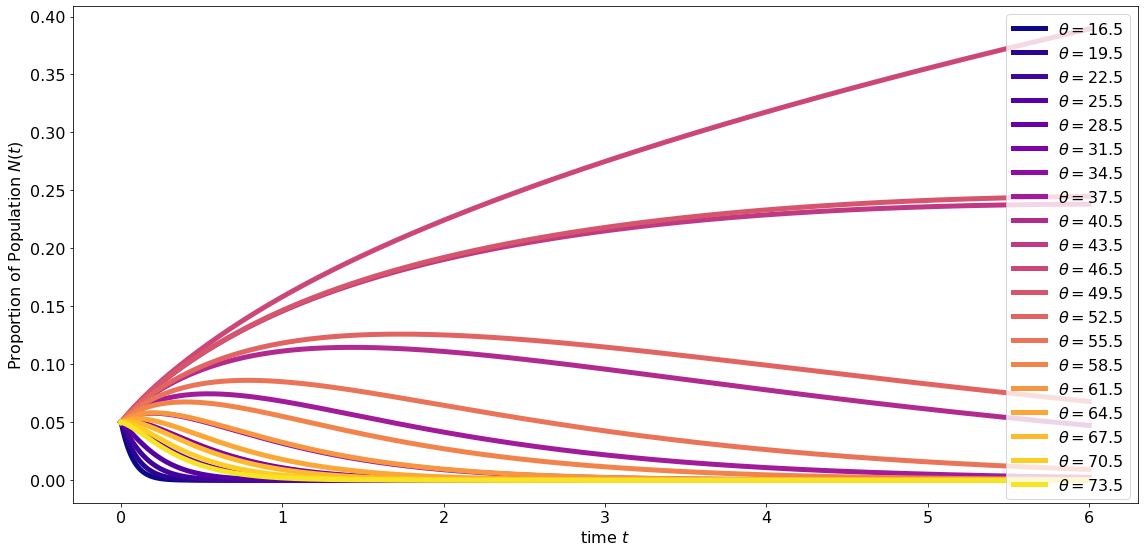

In [252]:
# compare to the direct calculation (unstable for ca t>6)
t_list = np.linspace(0, 6, 1000)
ns = odeint(deriv, state_init, t_list, args=params)
ns = np.array([timestep/np.sum(timestep) for timestep in ns])

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    #print(tmp_theta) 
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$") # because plasma needs values between 0 and 1

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()